<a target="_blank" href="https://colab.research.google.com/github/taobrienlbl/advanced_earth_science_data_analysis/blob/spring_2023_iub/lessons/07_machine_learning_intro/07_workalong01_machine_learning_basics.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Machine Learning Basics

This workalong walks through some of the basic elements of modern machine learning, including *rectified linear units (reLU)*, *loss functions*, *backpropagation*, and the use of `pytorch`.

## Rectified linear units (reLU)

In the cell below, implement two functions:
 1. `linear(x,w,b)`
 2. `relu(x)` 

as indicated in the functions' docstrings.  (Note, remove the lines with `pass` - this is just a line of code that says to Python "do nothing"...it's necessary because function's can't be empty in Python.)

Test that it works as expected, and keep your tests in the notebook.

In [1]:
""" Define a linear and relu function. """
import numpy as np

def linear(x : np.ndarray, w : float = 1, b : float = 0) -> np.ndarray:
    """ returns w*x + b """
    return w*x + b

def relu(x : np.ndarray) -> np.ndarray:
    """ returns x if x is positive, 0 otherwise"""
    return np.maximum(x, 0.0)

In [2]:
""" Test the relu function. """
x = np.asarray([[1, 5, 3],
                [3, 2, 4],
                [0, 5, 9]])
w = 2
b = 1

y1 = linear(x, w, b)
y2 = relu(x)

print(y1)
print(y2)

[[ 3 11  7]
 [ 7  5  9]
 [ 1 11 19]]
[[1. 5. 3.]
 [3. 2. 4.]
 [0. 5. 9.]]


In [3]:
import matplotlib.pyplot as plt

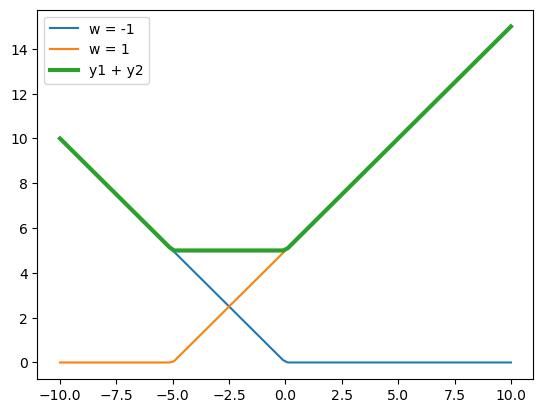

In [4]:
x = np.linspace(-10, 10, 100)
y1 = relu(linear(x, w=-1, b=0))
y2 = relu(linear(x, w=1, b=5))

fig, ax = plt.subplots()

ax.plot(x, y1, label="w = -1")
ax.plot(x, y2, label="w = 1")
ax.plot(x, y1+y2, label="y1 + y2", linewidth=3)

plt.legend()
plt.show()

## Fitting a function with reLUs

1. Run the cell below to create a graph of fake, noisy data (variable `noisy_data`).
1. In the cell below that, create a function `relu_sum` that is the sum of two reLUs with a bias (a scalar) added at the end
1. Create a new plot that includes the function output and the noisy data
1. Adjust the `w` and `b` parameters until the function approximates the fake data.
1. Comment in a markdown cell on your observations, what you learned, etc.



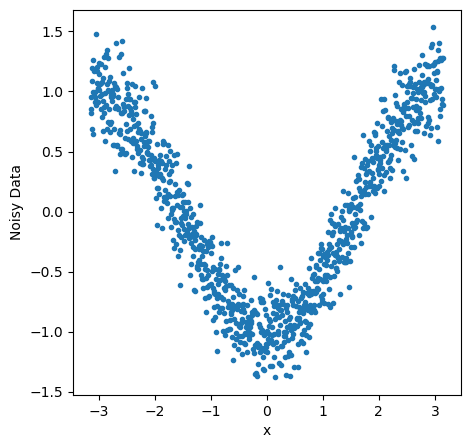

In [5]:
""" Create a fake, noisy dataset. """

# define the x values
x = np.linspace(-np.pi, np.pi, 1000)

# define the y values of the true function
y_true = -np.cos(x)

# add some noise to the true function
np.random.seed(5984)
noisy_data = y_true + np.random.normal(0, 0.2, len(x))

# plot the noisy data
fig, ax = plt.subplots(figsize = (5,5))
ax.plot(x, noisy_data, '.', label="data")
ax.set_xlabel("x")
ax.set_ylabel("Noisy Data")
plt.show()

In [6]:
x.shape

(1000,)

In [7]:
""" Define a function that is the sum of two relus. """

def relu_sum(x : np.ndarray, w : np.ndarray, b : np.ndarray, bias : float = 0) -> np.ndarray:
    """ returns relu(w[0]*x + b[0]) + relu(w[1]*x + b[1]) + bias """
    return relu(linear(x, w[0], b[0])) + relu(linear(x, w[1], b[1])) + bias

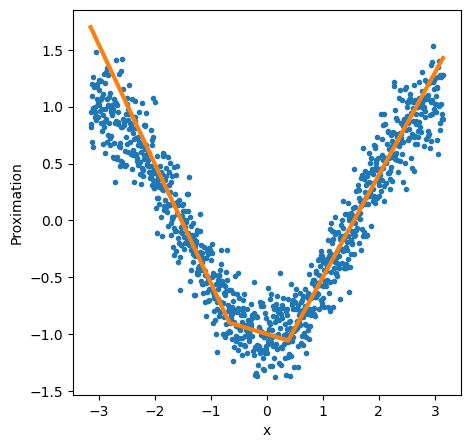

In [8]:
""" Plot the sum of two relus, with w, b such that the function fits the data. """
# define parameters
w = np.asarray([-1.05, 0.9])
b = np.asarray([0.4, 0.6])
bias = -2.0

z = relu_sum(x, w, b, bias)

# plot the sum of relus
fig, ax = plt.subplots(figsize = (5,5))
ax.plot(x, noisy_data, '.', label="data")
ax.plot(x, z, label="prox", linewidth=3)
ax.set_xlabel("x")
ax.set_ylabel("Proximation")
plt.show()

## Loss function

Now define a *loss* function $\mathcal{L}$: in this case *mean-squared error (MSE)* for the fit $\hat{\mathbf{z}}$ relative to the data $\mathbf{z}$

$$ \mathcal{L} = \frac{1}{N} \sum\limits_{i=0}^{N-1} (z_i - \hat{z}_i)^2$$

Calculate the loss for your fit to the data above: we'll compare in class.

In [9]:
""" Define a loss function. """

def loss(y_true : np.ndarray, y_pred : np.ndarray) -> float:
    """ returns the mean squared error between y_true and y_pred """
    return np.mean((y_true-y_pred)*(y_true-y_pred))

# calculate the loss for the fit
loss_relu = loss(noisy_data, z)
print(loss_relu)

0.06675991744353661


Add the loss to the title of the plot, and vary the parameters further to see if you can minimize the loss.

In [10]:
""" Vary parameters, minimizing the loss (include loss in title). """



' Vary parameters, minimizing the loss (include loss in title). '

## ReLUs in `pytorch`

Now we'll take advantage of `pytorch` for automating the process of fitting a NN model.

In [10]:
""" Define a neural network with a single hidden layer. """
# import pytorch
import torch
import torch.nn as nn
# set the random seed for reproducibility
torch.manual_seed(5984)


In [12]:
import numpy as np

In [11]:
class Net(nn.Module):
    def __init__(self, n_relus: int=2):
        # initialize the parent class
        super().__init__()

        # create a neural network
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1, n_relus),  # layer 1
            nn.ReLU(),              # layer 2
            nn.Linear(n_relus, 1)   # layer 3
        )
    
    def forward(self, x):
        out = self.linear_relu_stack(x)
        return out

In [12]:
test_net = Net()
test_net

Net(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1, out_features=2, bias=True)
    (1): ReLU()
    (2): Linear(in_features=2, out_features=1, bias=True)
  )
)

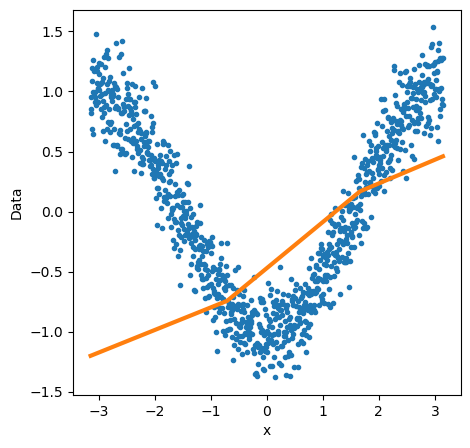

In [13]:
""" Show the initial model prediction/fit (it's bad)"""
# convert the x and y values to pytorch tensors
xt = torch.from_numpy(x).unsqueeze(1).to(torch.float32)
yt = torch.from_numpy(noisy_data).unsqueeze(1).to(torch.float32)

# create the 2 relu model
model_2 = Net(n_relus=2)

# calculate the prediction
pred = model_2(xt)

# plot the noisy data
fig, ax = plt.subplots(figsize = (5,5))
ax.plot(x, noisy_data, '.', label="data")
ax.plot(x, pred.detach().numpy(), label="prox", linewidth=3)
ax.set_xlabel("x")
ax.set_ylabel("Data")
plt.show()

### Training the model - the simple, but not-so-great way

We'll use a simple for loop to train the model on all the data.  This is bad because we don't split the dataset into train, test, and validation sets; this can make our efforts prone to overfitting.

But for simplicity, we'll forge forward with this (inadvisable) approach.

In [14]:
""" Train the model the bad way. """
# define the hyperparameters
learning_rate = 0.01
training_steps = 1000
num_relus = 2

# define the model
torch.manual_seed(5984)
model_2 = Net(n_relus=num_relus)

# define the loss function
loss_fn = nn.MSELoss()

# define the optimizer
optim = torch.optim.Adam(model_2.parameters(), lr=learning_rate)

# Training loop
for n in range(training_steps):
    # calcualte the prediction
    pred = model_2(xt)

    # calculate the loss
    loss = loss_fn(pred, yt)

    # reset the gradients
    optim.zero_grad()

    # calculate the gradients of the parameters
    loss.backward()

    # update the parameters with the optimizer
    optim.step()

    # print the loos every 100 steps
    if n % 100 == 0:
        print(f"Step {n}: {loss.item(): .3f}")


Step 0:  0.837
Step 100:  0.223
Step 200:  0.046
Step 300:  0.045
Step 400:  0.045
Step 500:  0.045
Step 600:  0.045
Step 700:  0.045
Step 800:  0.045
Step 900:  0.045


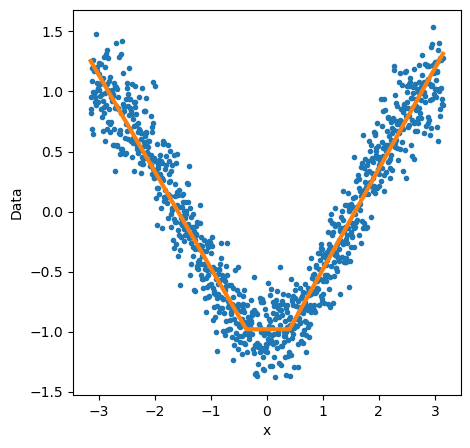

In [15]:
""" Plot the trained model. """
#for name, param in model_2

fig, ax = plt.subplots(figsize = (5,5))
ax.plot(x, noisy_data, '.', label="data")
ax.plot(x, pred.detach().numpy(), label="prox", linewidth=3)
ax.set_xlabel("x")
ax.set_ylabel("Data")
plt.show()

### Training the model - the better, but more complicated way

We'll follow standard practice here to split the data into test, train and validation sets.  We'll also use pytorch's data loader to do training in batches, and we'll put our training loop into a function.  This will allow us to train in *epochs* (passes through the entire dataset).

In [23]:
""" Train the model the better, but more complicated way. """
# set hyperparameters
learning_rate = 0.01
num_epochs = 20
batch_size = 32
training_fraction = 0.8
test_fraction = 0.1
num_relus = 2

# define the model
torch.manual_seed(5984)
model_2 = Net(n_relus=num_relus)

# define the loss function
loss_fn = nn.MSELoss()

# define the optimizer
optim = torch.optim.Adam(model_2.parameters(), lr=learning_rate)

# set the sizes of the training, test and validation sets
num_data_total = len(x)
n_train = int(training_fraction*num_data_total)
n_test = int(test_fraction*num_data_total)
n_val = num_data_total - n_train - n_test

print(n_train, n_test, n_val)

# create a random set of indices
np.random.seed(5984)
i_random = np.random.choice(num_data_total, num_data_total, replace=False)

i_train = i_random[:n_train]
i_test = i_random[n_train:(n_train+n_test)]
i_val = i_random[(n_train+n_test):]

# create the tensor datasets
from torch.utils.data import TensorDataset, DataLoader
x_train = xt[i_train]
y_train = yt[i_train]
train_ds = TensorDataset(x_train, y_train)

x_test = xt[i_test]
y_test = yt[i_test]
test_ds = TensorDataset(x_test, y_test)

x_val = xt[i_val]
y_val = yt[i_val]
val_ds = TensorDataset(x_val, y_val)

# create the data loaders
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=batch_size, shuffle=False)
val_dl = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

def train_loop(dataloader, model, loss_fn, optim):
    # set the model to training mode
    model.train()

    # a list of losses for each batch
    batch_loss = []

    # loop over batches
    for batch_num, (xx, yy) in enumerate(dataloader):
        # reset the gradients
        optim.zero_grad()

        # run the model
        pred = model(xx)

        # calculate the loss
        loss = loss_fn(yy, pred)

        # calculate the gradients of the parameters wrt the loss
        loss.backward()

        # update the parameters with the optimizer
        optim.step()

        # save the loss in the list
        batch_loss.append(loss.item())
    
    # calculate the average loss
    avg_loss = np.mean(batch_loss)

    return avg_loss

def test_loop(dataloader, model, loss_fn):
    # put the model in evaluation mode
    model.eval()

    # initialize the loss
    loss = 0

    with torch.no_grad():   # no need to caluclate gradients when testing
        # loop over the batches
        for xx, yy in dataloader:
            # calculate the prediction
            pred = model(xx)

            # calcualte the loss and update the running total
            loss_partial = loss_fn(yy, pred)
            loss += loss_partial
    
    # return the average loss across btaches
    average_loss = loss / len(dataloader)
    return average_loss


800 100 100


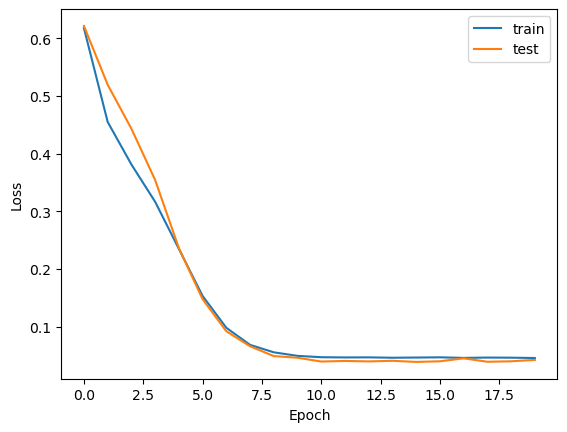

In [24]:
""" Train the model """
# track the training loss
train_loss = []
test_loss = []

for epoch in range(num_epochs):
    # run the training loop
    train_loss.append(train_loop(train_dl, model_2, loss_fn, optim))
    # run the test loop
    test_loss.append(test_loop(test_dl, model_2, loss_fn))



fig, ax = plt.subplots()
ax.plot(train_loss, label="train")
ax.plot(test_loss, label="test")
ax.legend()
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (5,5))
ax.plot(x, noisy_data, '.', label="data")
ax.plot(x, pred.detach().numpy(), label="prox", linewidth=3)
ax.set_xlabel("x")
ax.set_ylabel("Data")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (5,5))
ax.plot(x, noisy_data, '.', label="data")
ax.plot(x[i_test], noisy_data[i_test])
ax.set_xlabel("x")
ax.set_ylabel("Data")
plt.show()

In [18]:
i_random

array([534, 626, 131, 425, 109, 312, 168, 703, 276, 844, 610, 880, 242,
       881, 370, 164,  14, 644, 424, 585, 264, 583, 868, 472, 176, 599,
       199, 851, 361, 186, 605, 198, 751, 415, 893, 652, 771, 233, 648,
       320,  50, 918,  21, 672, 209, 878, 344, 188, 526, 517, 629, 980,
       646, 552, 318, 669,  44, 175,  89, 310, 105, 373, 809, 592, 246,
       490, 461, 755, 249, 749, 230, 223, 305, 207, 857, 774, 877, 473,
       854, 406, 886, 463, 916, 544, 222, 239, 546, 380, 566, 602,  99,
       549, 785, 348, 411, 470, 994, 431, 860, 697, 693, 765, 240, 414,
       398, 194,  26, 934,  88, 806, 499, 864, 304, 271, 292, 528, 957,
       141, 519, 711, 260, 772,  96, 919, 294, 493, 606, 983,  81, 960,
       586, 339, 349, 729, 662, 630, 523, 254, 971, 314, 342, 104, 660,
       434, 694, 778,  66, 520, 987, 275, 846, 827,  41, 541, 925, 822,
       102, 863, 266, 802, 807, 428, 562, 452, 773, 204, 138, 622, 616,
       128, 299, 865, 884, 632,   5, 945,  75,  10, 741,  62, 58

In [ ]:
# np.random.choice
np.random.choice(100, 20, replace=False)


In [19]:
""" Plot the prediction """


' Plot the prediction '